# ASSIGNMENT - 04 Implementation of Naive Bayes Classifier and Logistic Regression
## NAMES:- C SURYA KIRAN , KALLA BHARATH VARDHAN
## REG Nos :- 21BCE1110 , 21BCE5846
## SUBJECT :- Machine Learning Lab BCSE209P


# **Binary** **classification**

**Objective**


Binary classification, a core machine learning approach, involves categorizing input data into one of two classes. An illustrative example is in sentiment analysis for customer reviews, where the objective is to determine whether a review expresses positive or negative sentiment. Through training on a labeled dataset, the model learns patterns that distinguish between these sentiment classes. Algorithms like logistic regression or support vector machines utilize these learned patterns to predict the sentiment of new, unseen reviews. Evaluation metrics such as accuracy and precision offer quantitative assessments of the model's effectiveness in correctly classifying sentiments, showcasing the versatility of binary classification in applications beyond health diagnostics, such as customer feedback analysis.

**DataSet description**

My Dataset for Naive bayes and logistic regression of binary classification is Customer Retention data and this dataset predicts customer conversion rate. This dataset has categories like (recency: months since last purchase,
history: $value of the historical purchases,
used_discount: indicates if the customer used a discount before,
used_bogo: indicates if the customer used a buy one get one before,
zip_code: class of the zip code as Suburban/Urban/Rural,
is_referral:indicates if the customer was acquired from referral channel,
channel: customer using, Phone/Web/Multichannel,
offer: the offers sent to the customers, Discount/But One Get One/No Offer,
conversion: customer conversion(buy or not))



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [77]:
df_encoded.shape

(64000, 15)

In [75]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recency                64000 non-null  int64  
 1   history                64000 non-null  float64
 2   used_discount          64000 non-null  int64  
 3   used_bogo              64000 non-null  int64  
 4   is_referral            64000 non-null  int64  
 5   conversion             64000 non-null  int64  
 6   zip_code_Rural         64000 non-null  uint8  
 7   zip_code_Surburban     64000 non-null  uint8  
 8   zip_code_Urban         64000 non-null  uint8  
 9   channel_Multichannel   64000 non-null  uint8  
 10  channel_Phone          64000 non-null  uint8  
 11  channel_Web            64000 non-null  uint8  
 12  offer_Buy One Get One  64000 non-null  uint8  
 13  offer_Discount         64000 non-null  uint8  
 14  offer_No Offer         64000 non-null  uint8  
dtypes:

In [78]:
df_encoded.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,0,1,0,0,1,0,1,0,0
1,6,329.08,1,1,1,0,1,0,0,0,0,1,0,0,1
2,7,180.65,0,1,1,0,0,1,0,0,0,1,1,0,0
3,9,675.83,1,0,1,0,1,0,0,0,0,1,0,1,0
4,2,45.34,1,0,0,0,0,0,1,0,0,1,1,0,0


In [79]:
df_encoded.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781,0.149422,0.449625,0.400953,0.121281,0.437828,0.440891,0.334172,0.332922,0.332906
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890,0.356507,0.497460,0.490095,0.326456,0.496123,0.496498,0.471704,0.471263,0.471257
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
df_encoded.corr()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
recency,1.000000,-0.246591,-0.031336,-0.026617,-0.052106,-0.074765,-0.004006,0.010144,-0.007382,-0.105414,0.033666,0.035671,0.000831,0.001996,-0.002828
history,-0.246591,1.000000,0.112677,0.114685,0.223279,0.065153,0.001257,-0.005634,0.004804,0.404474,-0.135321,-0.130730,0.001247,0.002069,-0.003318
used_discount,-0.031336,0.112677,1.000000,-0.816943,0.020900,0.006712,0.000836,-0.003630,0.003076,0.060999,-0.020987,-0.019136,-0.002991,-0.000122,0.003115
used_bogo,-0.026617,0.114685,-0.816943,1.000000,0.021346,0.051999,-0.001846,0.000713,0.000619,0.055613,-0.019096,-0.017485,0.000544,0.002409,-0.002953
is_referral,-0.052106,0.223279,0.020900,0.021346,1.000000,-0.073924,-0.004735,0.002026,0.001388,0.069453,-0.015782,-0.029897,0.001416,-0.001024,-0.000394
conversion,-0.074765,0.065153,0.006712,0.051999,-0.073924,1.000000,0.048961,-0.017465,-0.017888,0.026195,-0.048944,0.031683,0.009247,0.071817,-0.081073
zip_code_Rural,-0.004006,0.001257,0.000836,-0.001846,-0.004735,0.048961,1.000000,-0.378831,-0.342899,-0.004003,0.000711,0.001921,-0.001365,0.005512,-0.004146
zip_code_Surburban,0.010144,-0.005634,-0.003630,0.000713,0.002026,-0.017465,-0.378831,1.000000,-0.739456,-0.002404,-0.004935,0.006512,0.002255,-0.005276,0.003019
zip_code_Urban,-0.007382,0.004804,0.003076,0.000619,0.001388,-0.017888,-0.342899,-0.739456,1.000000,0.005352,0.004491,-0.008007,-0.001297,0.001346,-0.000048
channel_Multichannel,-0.105414,0.404474,0.060999,0.055613,0.069453,0.026195,-0.004003,-0.002404,0.005352,1.000000,-0.327861,-0.329905,-0.001506,-0.000725,0.002233


**Exploratory Analytics**

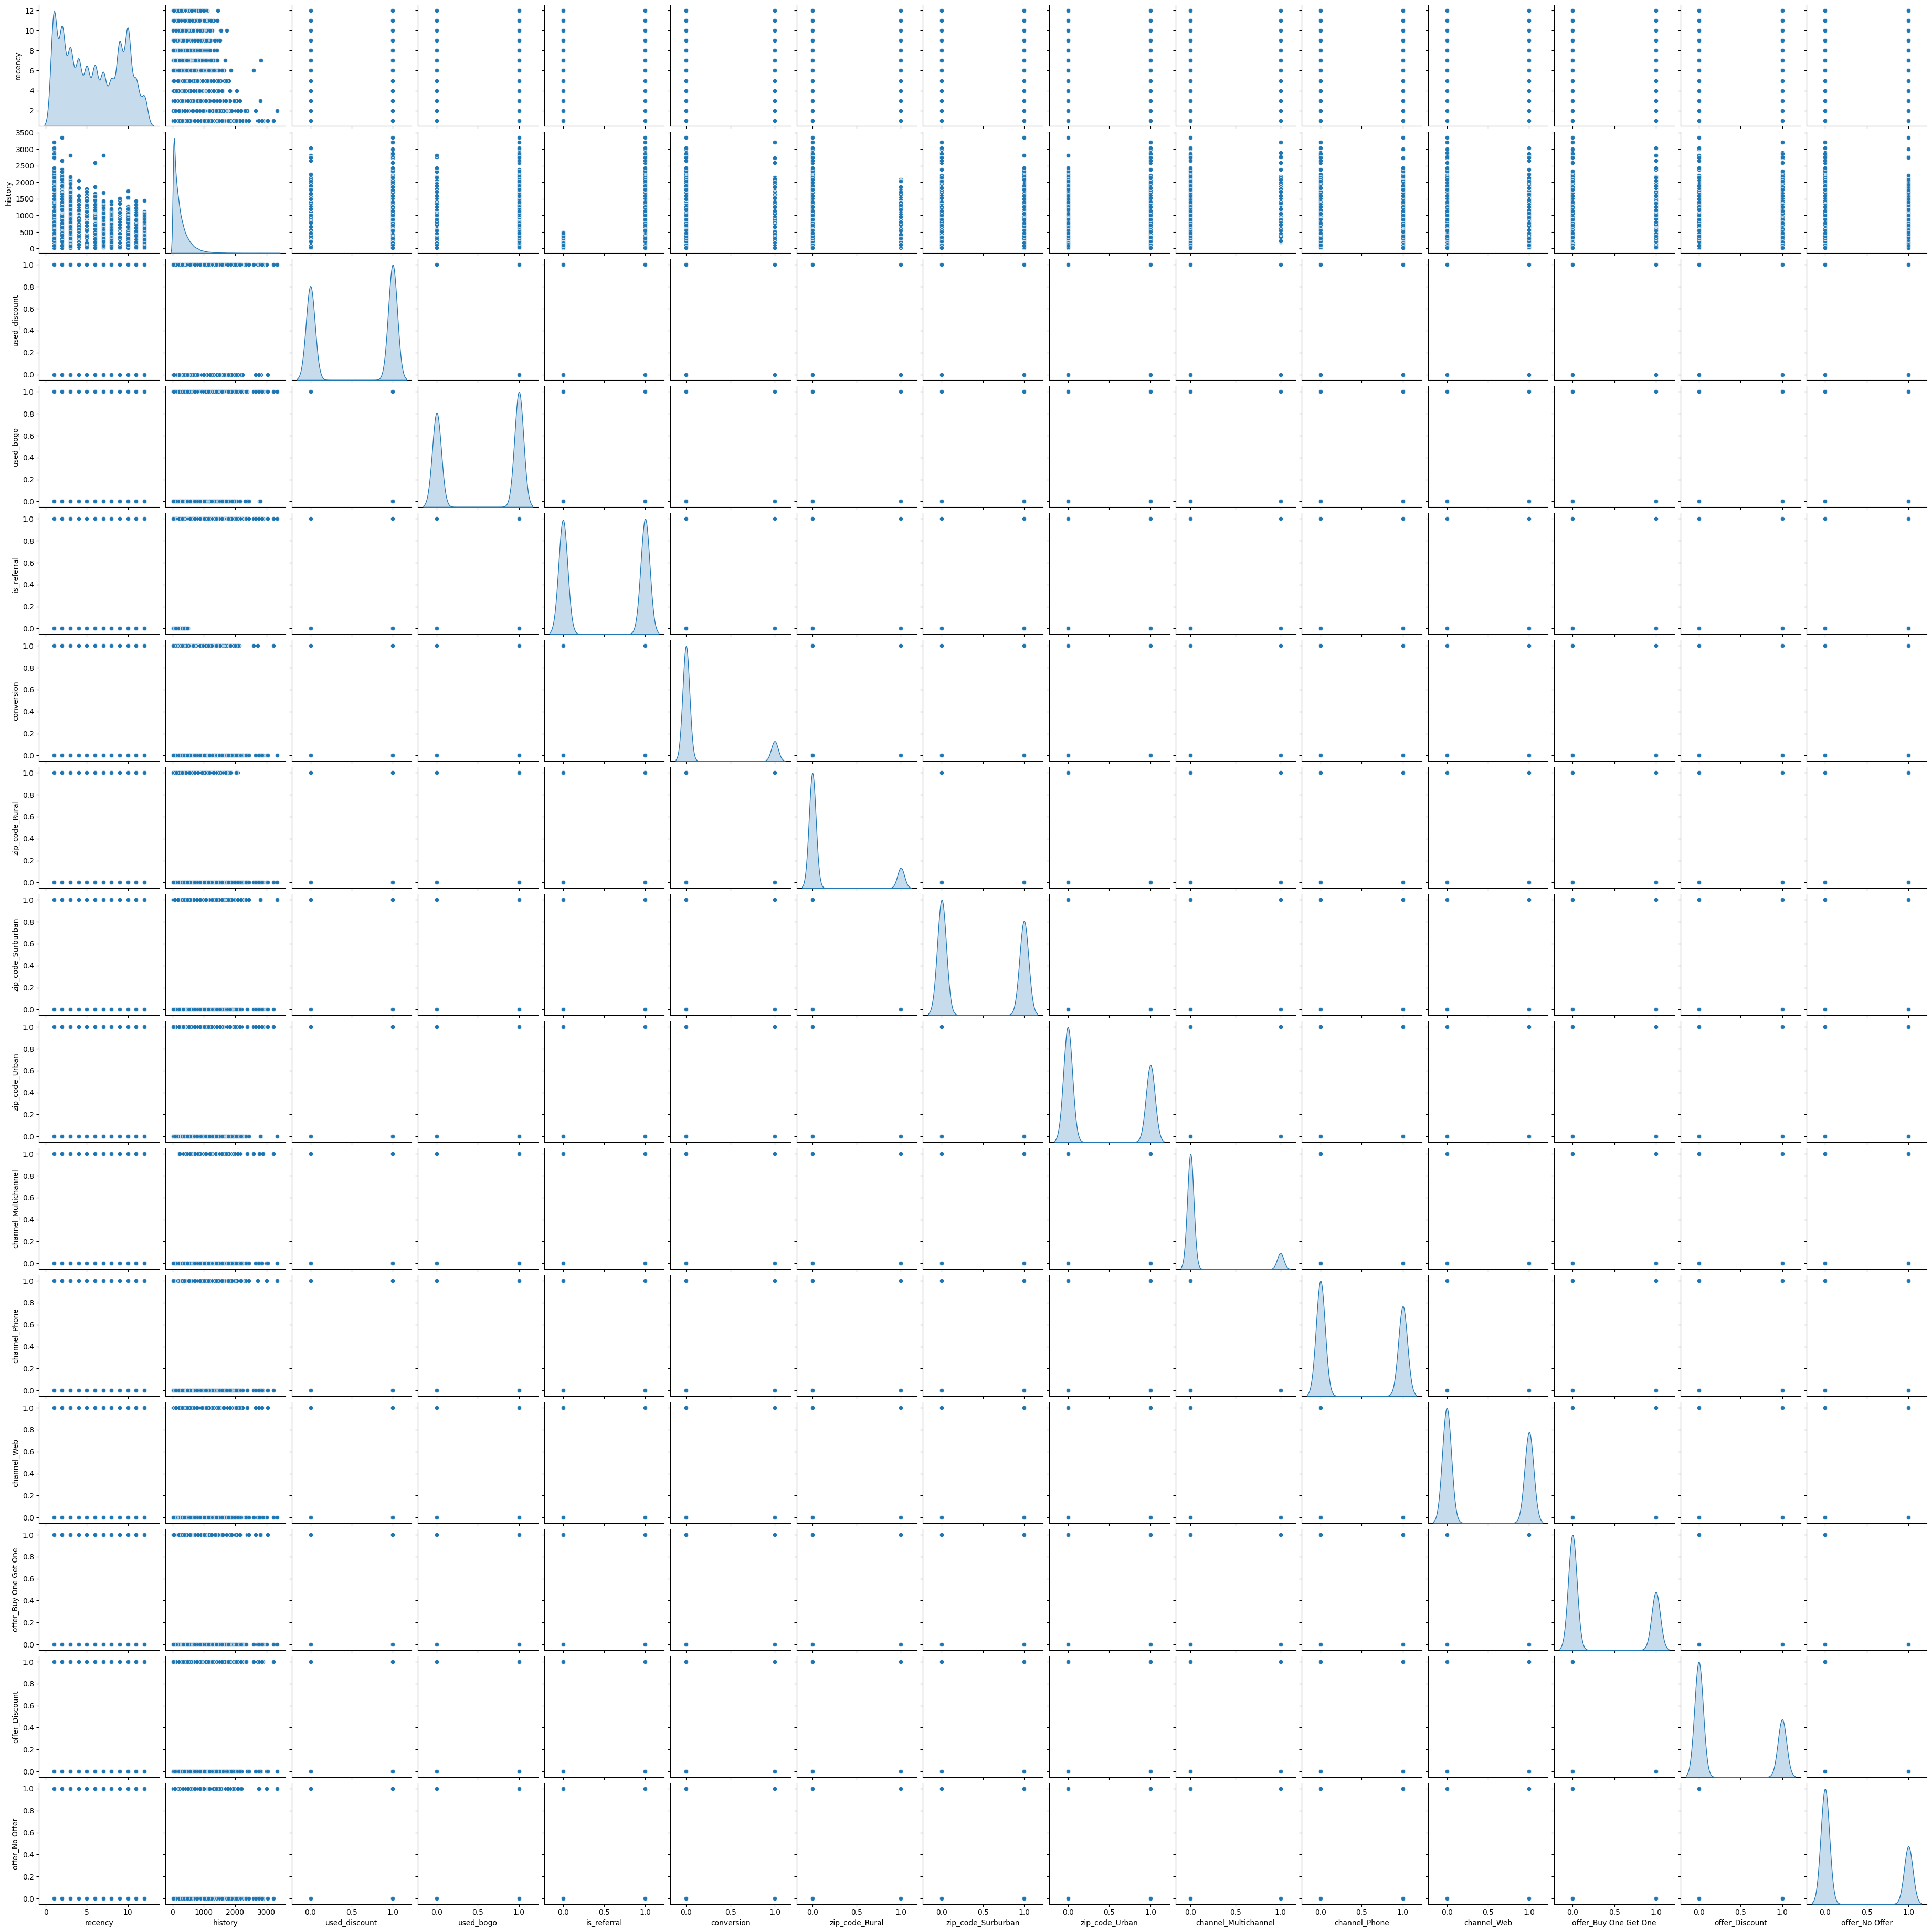

In [74]:
sns.pairplot(df_encoded,diag_kind='kde')

<Axes: >

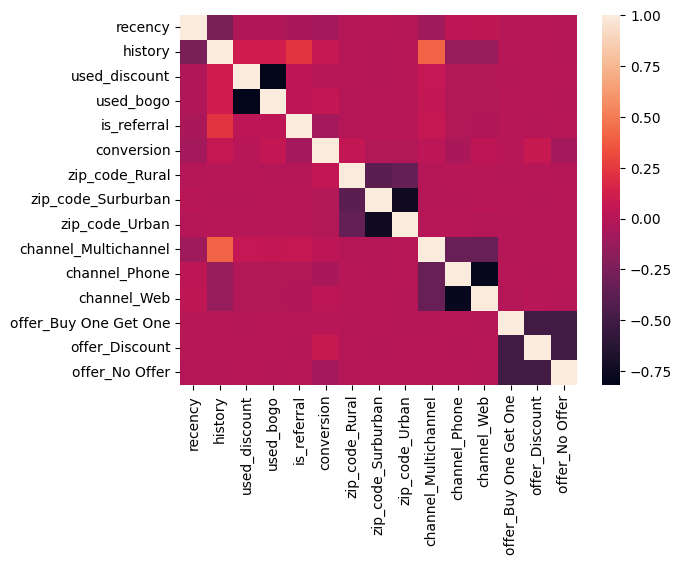

In [64]:
sns.heatmap(df_encoded.corr())

<Axes: xlabel='recency', ylabel='conversion'>

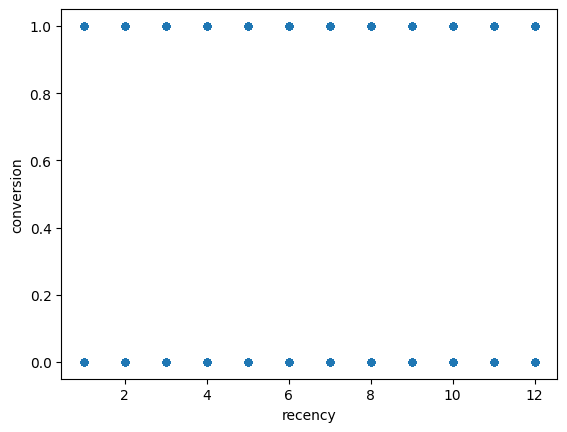

In [65]:
df_encoded.plot(kind='scatter', x='recency', y='conversion')

<Axes: xlabel='used_discount', ylabel='conversion'>

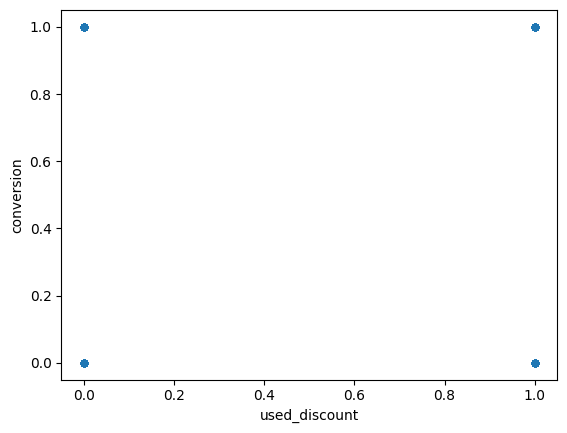

In [66]:
df_encoded.plot(kind='scatter', x='used_discount', y='conversion')

<Axes: xlabel='used_bogo', ylabel='conversion'>

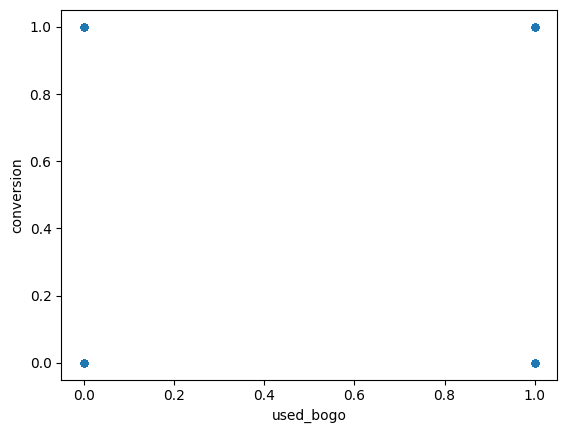

In [67]:
df_encoded.plot(kind='scatter', x='used_bogo', y='conversion')

<Axes: xlabel='history', ylabel='conversion'>

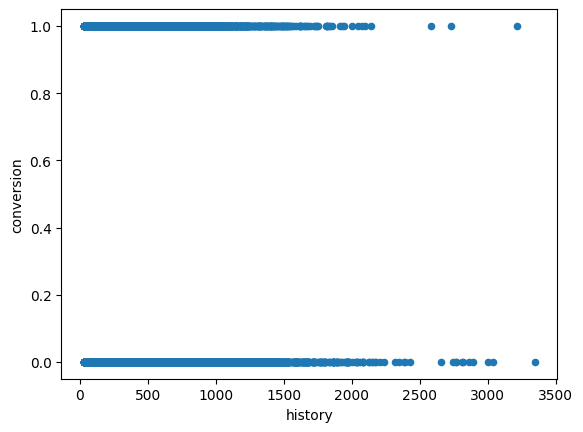

In [68]:
df_encoded.plot(kind='scatter', x='history', y='conversion')

<Axes: xlabel='is_referral', ylabel='conversion'>

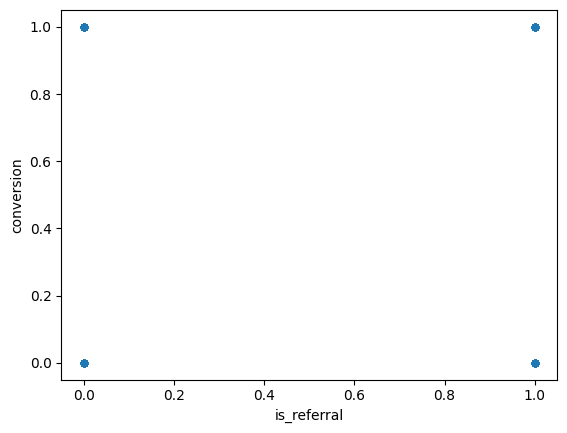

In [73]:
df_encoded.plot(kind='scatter', x='is_referral', y='conversion')


**Methodology**

# **Naive Bayes classifier**

Before we start the training process, we need to split the dataset into training and testing for model evaluation. Build a generic Gaussian Naive Bayes and train it on a training dataset. After that, feed a random test sample to the model to get a predicted value. We will not evolve the model on an unseen test dataset. First, we will predict the values for the test dataset and use them to calculate accuracy and F1 score.



In [3]:
binary = pd.read_csv('/content/conversion.csv')

In [63]:
df_encoded = pd.get_dummies(binary, columns=['zip_code', 'channel', 'offer'])


In [9]:
target = df_encoded.conversion
inputs = df_encoded.drop('conversion',axis='columns')

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.3)

In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()



In [13]:
model.fit(X_train, y_train)

GaussianNB()

In [14]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8409895833333333
F1 Score: 0.8896668223533974


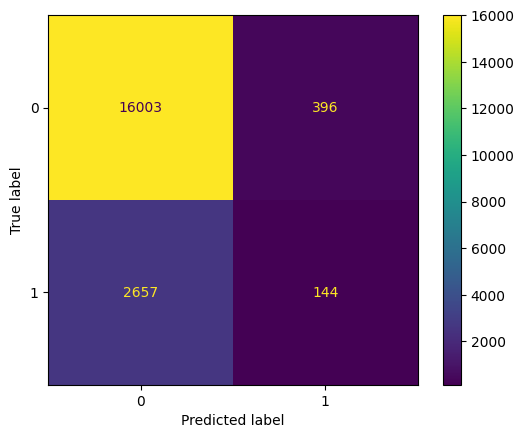

In [16]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


In [19]:
y_pred_prob = model.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.78413058, 0.21586942],
       [0.78779918, 0.21220082],
       [0.90768995, 0.09231005],
       [0.8224994 , 0.1775006 ],
       [0.90101008, 0.09898992],
       [0.75358289, 0.24641711],
       [0.87826485, 0.12173515],
       [0.85651169, 0.14348831],
       [0.85394717, 0.14605283],
       [0.95650879, 0.04349121]])

**Results analysis And conclusion**

The Naive Bayes model achieved an accuracy of 84.10% and an F1 score of 88.97%. These results indicate a solid performance in predicting customer conversion rates.
The model's accuracy suggests that it accurately predicts conversions in a majority of cases, while the F1 score indicates a good balance between precision and recall.
In summary, the Naive Bayes model offers a reliable approach to predicting customer conversion rates, providing valuable insights for business decision-making.

# **Logistic regression**

Logistic regression is a straightforward and efficient method commonly used for binary and linear classification problems. It serves as a classification model that is both easy to implement and exhibits strong performance, particularly when dealing with linearly separable classes. Due to its simplicity and effectiveness, logistic regression finds widespread application in various industries for classification tasks.



In [20]:
from sklearn.linear_model import LogisticRegression

In [52]:
lm1 = LogisticRegression(solver='saga')

In [53]:
lm1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [37]:
y_pred=lml.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.85421875

In [43]:
f1 = f1_score(y_pred, y_test, average="weighted")
f1

0.9212739509837856

In [40]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16399,     0],
       [ 2799,     2]])

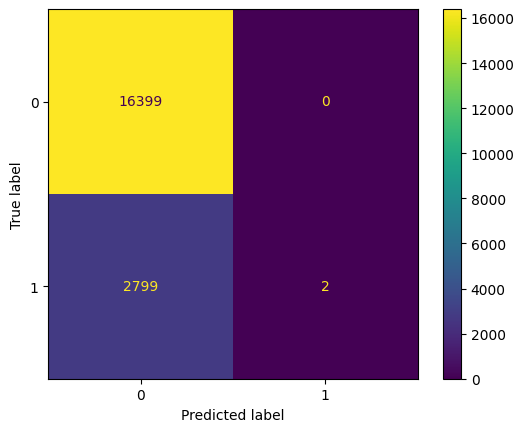

In [42]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = lm1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

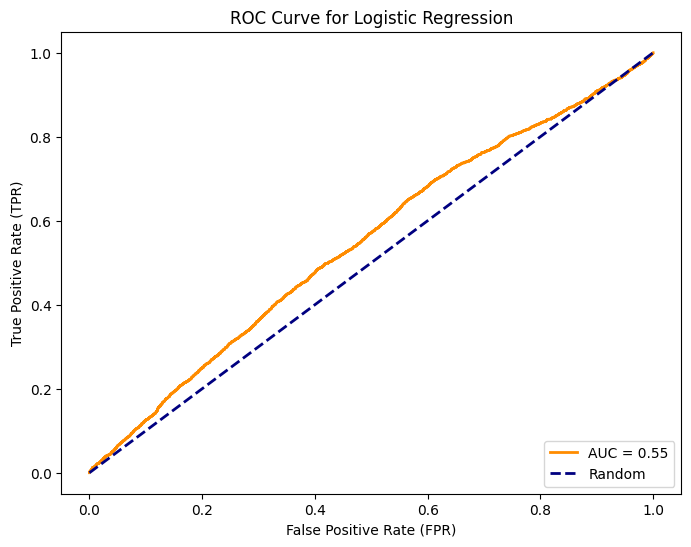

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [60]:
from sklearn.metrics import classification_report
target_names = ['converted   ','not converted']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

    converted       0.85      1.00      0.92     16399
not converted       1.00      0.00      0.00      2801

     accuracy                           0.85     19200
    macro avg       0.93      0.50      0.46     19200
 weighted avg       0.88      0.85      0.79     19200



**Results analysis And conclusion**

The logistic regression model accuracy stands at 85.42%, indicating that it correctly predicts customer conversions in a majority of cases. Additionally, the F1 score of 92.13% highlights the model's ability to balance precision and recall effectively. These results suggest that the model is proficient in identifying potential conversions and minimizing false predictions. In practical terms, this means businesses can rely on the model to optimize their conversion strategies and target marketing efforts more efficiently.

**References**

https://www.kaggle.com/datasets/davinwijaya/customer-retention

# **Multi class classification**

**Objective**

In multiclass classification, the main goal is to assign input data into one of several distinct categories or classes. For instance, when analyzing flower species, the aim is to accurately identify which species a given observation belongs to, involving more than just a binary choice. This task requires algorithms such as multinomial logistic regression and decision trees, which excel at handling scenarios with multiple categories. Training these models involves using a labeled dataset containing diverse instances from each class, allowing the model to learn complex patterns and relationships. Evaluation metrics like accuracy and F1 score help gauge the model's ability to correctly assign instances to their respective classes, highlighting the importance of multiclass classification across various applications, including image recognition and language processing.

**Dataset Description**

My dataset for multinomial naive bayes classifier of multi class classification is Milk Quality Prediction.This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.The target variable is nothing but the Grade of the milk.The grade classes are low,medium,high.


In [83]:
multi.shape

(1059, 8)

In [84]:
multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [85]:
multi.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [86]:
multi.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


**Exploratory Analytics**

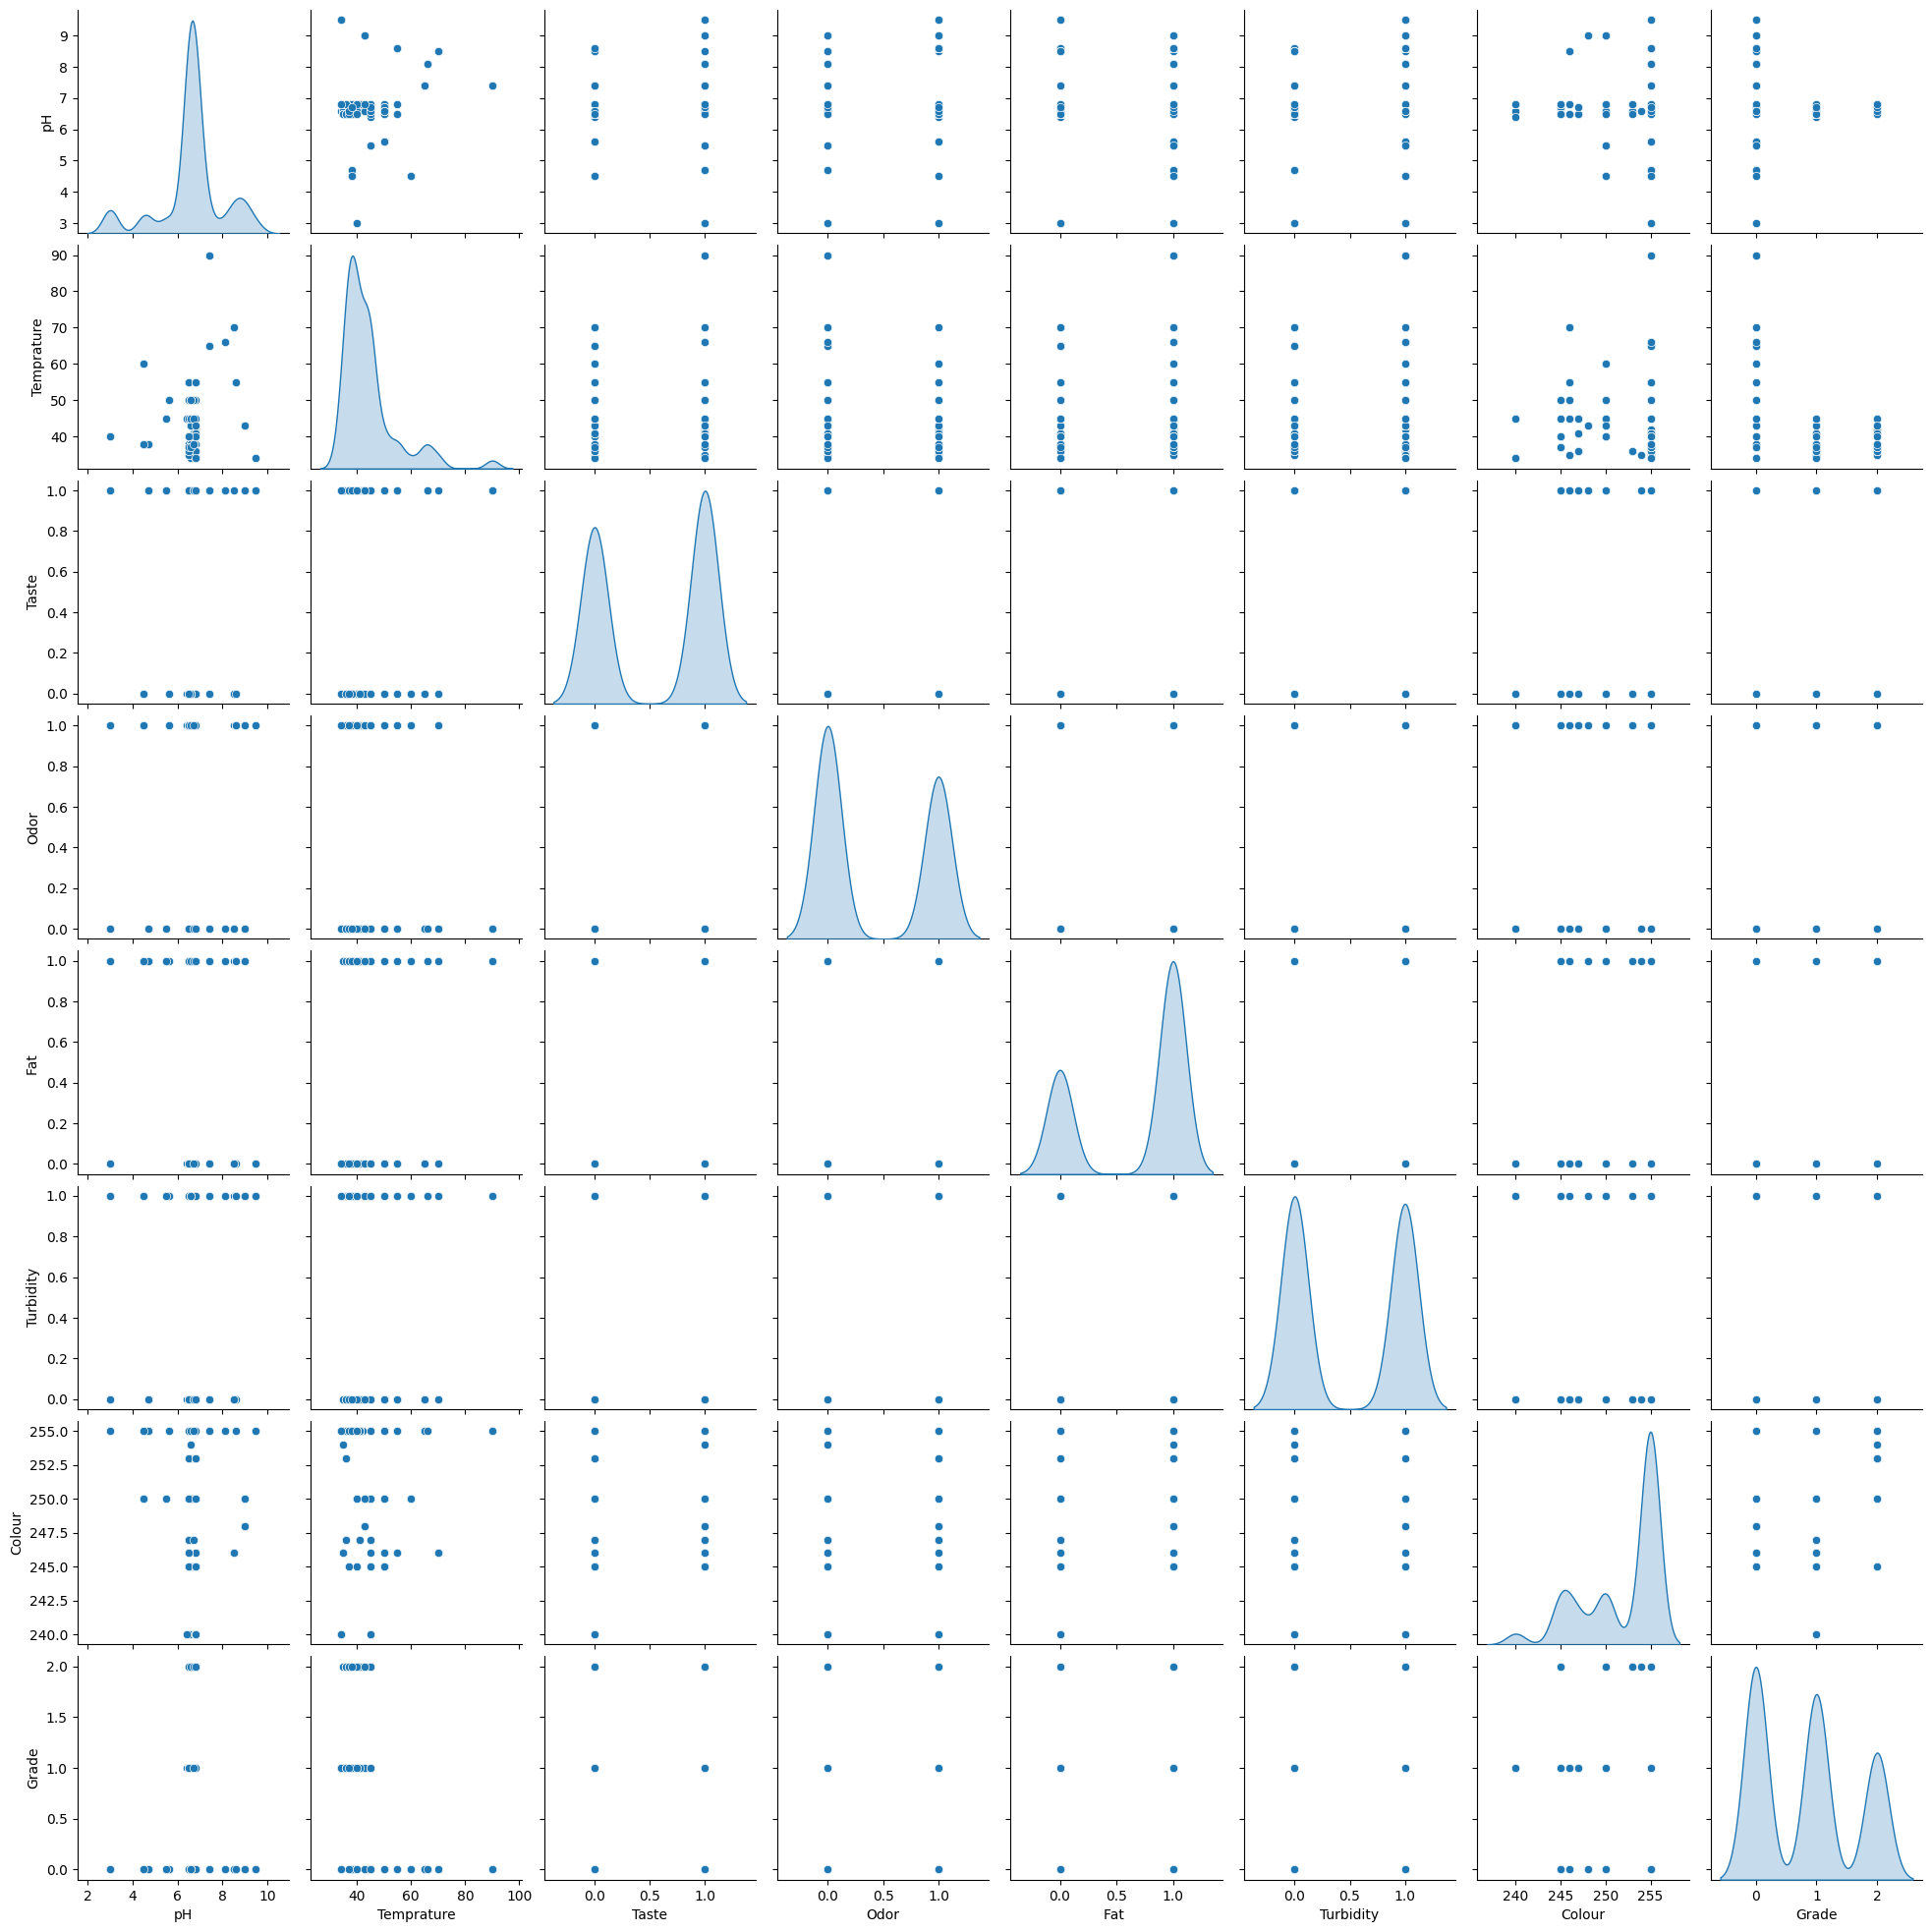

In [87]:
sns.pairplot(multi,diag_kind='kde')

<Axes: >

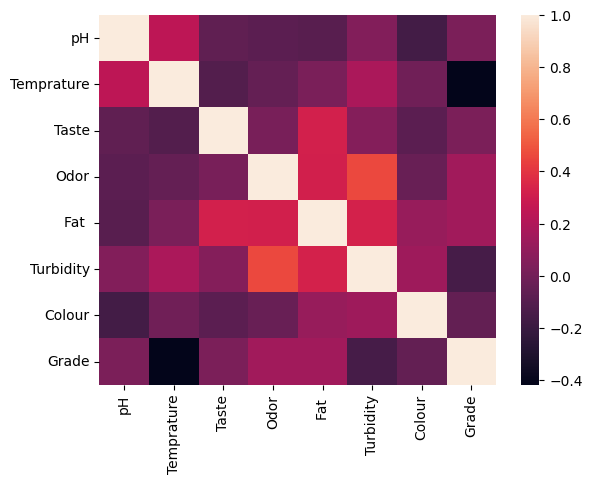

In [88]:
sns.heatmap(multi.corr())

<Axes: xlabel='pH', ylabel='Grade'>

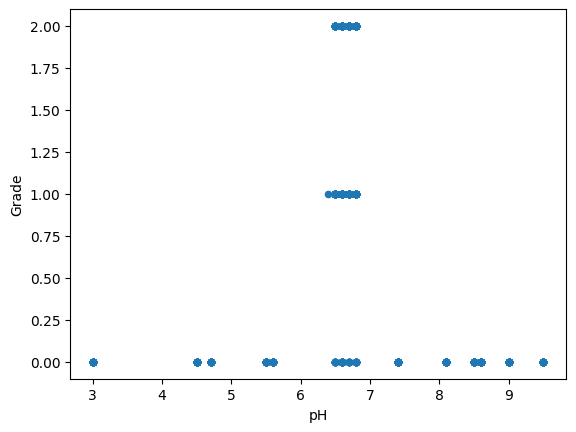

In [89]:
multi.plot(kind='scatter', x='pH', y='Grade')

<Axes: xlabel='Temprature', ylabel='Grade'>

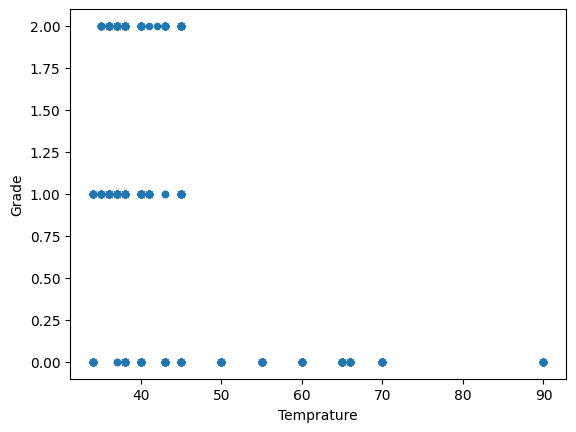

In [90]:
multi.plot(kind='scatter', x='Temprature', y='Grade')

<Axes: xlabel='Taste', ylabel='Grade'>

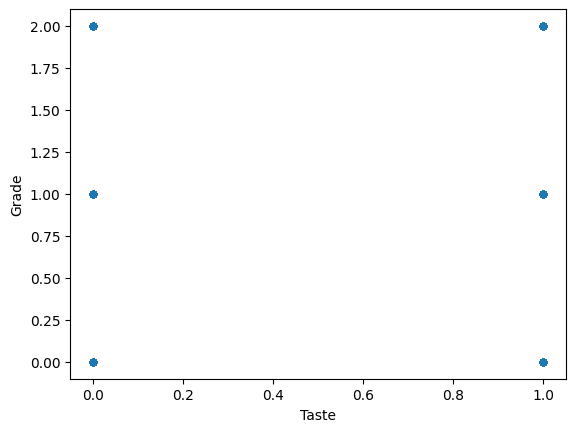

In [91]:
multi.plot(kind='scatter', x='Taste', y='Grade')

<Axes: xlabel='Odor', ylabel='Grade'>

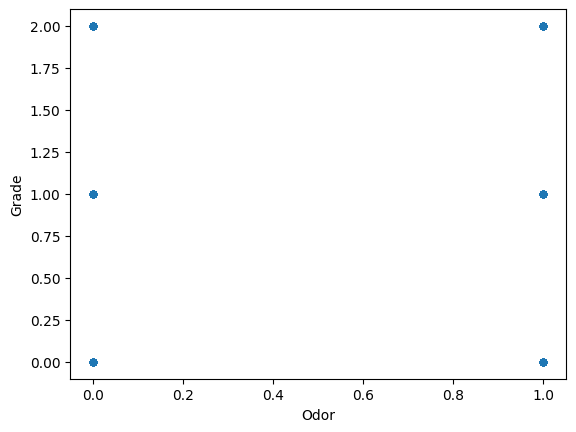

In [92]:
multi.plot(kind='scatter', x='Odor', y='Grade')

<Axes: xlabel='Fat ', ylabel='Grade'>

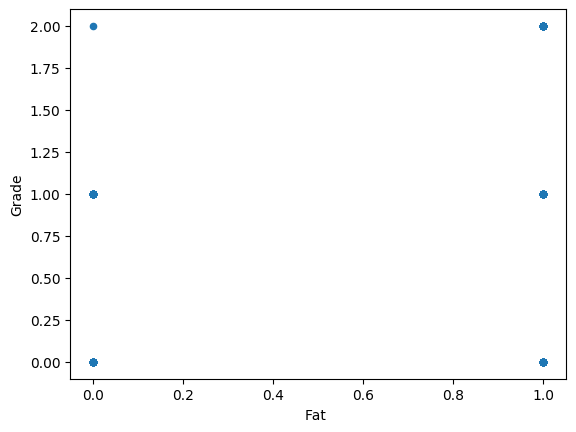

In [93]:
multi.plot(kind='scatter', x='Fat ', y='Grade')

<Axes: xlabel='Turbidity', ylabel='Grade'>

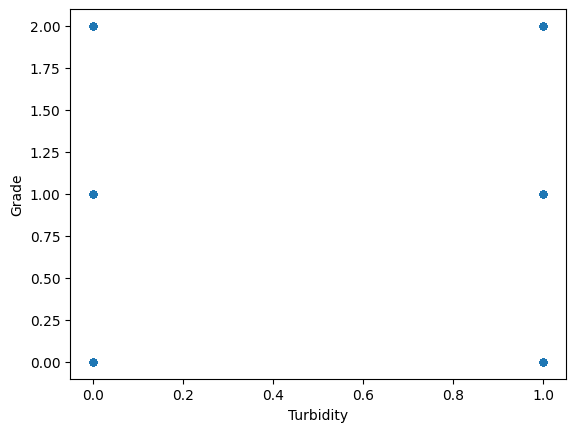

In [94]:
multi.plot(kind='scatter', x='Turbidity', y='Grade')

<Axes: xlabel='Colour', ylabel='Grade'>

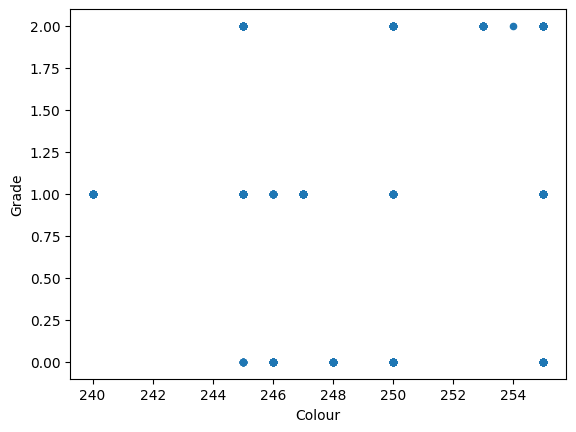

In [95]:
multi.plot(kind='scatter', x='Colour', y='Grade')

**Methodology**

# **Multinomial Naive bayes Classifier**

In [81]:
multi = pd.read_csv('/content/milknew.csv')

In [82]:
multi['Grade'] = multi['Grade'].map({'low': 0, 'medium': 1,'high':2})


In [97]:
x=multi.drop('Grade', axis=1)
Y=multi['Grade']

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(
    x, Y, test_size=0.33, random_state=125
)

In [102]:
x_train = np.abs(x_train)
x_test = np.abs(x_test)

In [110]:
from sklearn.naive_bayes import MultinomialNB
x_train.dropna(inplace=True)
Y_train = Y_train[x_train.index]
lm = MultinomialNB()
lm.fit(x_train, Y_train);

In [111]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
Y_pred = lm.predict(x_test)
accuray = accuracy_score(Y_pred, Y_test)
f1 = f1_score(Y_pred, Y_test, average="weighted")
print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5914285714285714
F1 Score: 0.5902541692262189


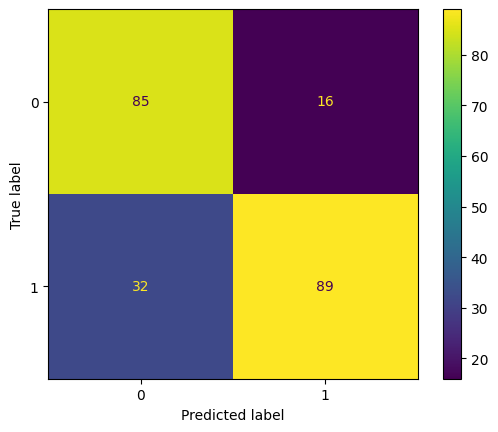

In [113]:
labels = [0,1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

**Results analysis and Conclusion**

The Multinomial Naive Bayes Classifier achieved an accuracy of approximately 59.14% and an F1 score of around 59.03% when applied to the milk quality dataset. While these metrics demonstrate moderate performance in categorizing milk quality attributes into distinct classes, there remains room for improvement. Further optimization through feature engineering, model fine-tuning, data preprocessing, and cross-validation could enhance the classifier's predictive accuracy and reliability. Despite serving as a baseline model for milk quality classification, ongoing refinement is necessary to develop a robust and accurate system for practical applications in the dairy industry.

**References**

https://www.kaggle.com/datasets/cpluzshrijayan/milkquality